# --------Making Linear Regression Model Code------

#      =========We will use Pandas, Numpy===========

In [7]:
#          ========= Developed by Mahesh Patel ==================

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(10)

In [104]:
# Importing the data for linear regression
data = pd.read_csv('datasets//TaxiFareActualsData.csv', sep =',')

In [105]:
# check the shape of data
data.shape

(24, 2)

In [106]:
data.head()

,Distance,Fare
0,0.4,70
1,7.2,210
2,1.8,110
3,3.6,150
4,4.4,150


Text(0, 0.5, 'Fare')

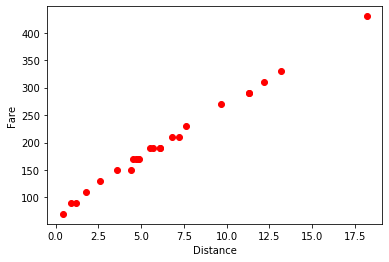

In [107]:
# lets draw our data
plt.scatter(data.Distance, data.Fare, color ="red")
plt.xlabel("Distance")
plt.ylabel("Fare")

In [108]:
# divide data into train and test
train_x, test_x, train_y, test_y = data.iloc[0:16,0], data.iloc[16:,0], data.iloc[0:16,1], data.iloc[16:,1]

### Will start with defination of line

### y = mx+c

In [347]:
def equation_line(x,m=11,c=11):
    y = m*x+c
    return y

In [110]:
def comparing_out_value(original_y, calculated_y):
    return((original_y == calculated_y))

In [111]:
def absolute_error(original_y, calculated_y):
    """
    1.this is a function that calculates absolute difference and then sums
    2. it to give error value
    2.example :
    arrays1 = [1,2]
    arrays1 = [2,3]
    abs = abs(-1)+abs(1) =2
    """
    abs_err = np.sum(np.absolute(original_y- calculated_y))
    #print("abs_err", abs_err)
    return abs_err

In [112]:
#absolute_error()

In [113]:
def SSE(original_y, calculated_y):
    """
    1.this gives sum of sqaured error and those are pretty big 
    2.this helps take care of outliers because those outliers will give big values
    and our model tries to reduce those value
    3.this shows square of the amount of total error of all data points
    """
    sse = np.sum((original_y- calculated_y)**2)
    return sse

In [114]:
def RMSE(original_y, calculated_y):
    """
    1.this gives root of mean of sum of sqaured error and those are pretty big 
    2.this helps take care of outliers because those outliers will give big values
    and our model tries to reduce those value
    3. this is error per data point
    """
    #print(len(original_y))
    sse = np.sum(((original_y- calculated_y)**2)/len(original_y))
    return np.sqrt(sse)

## We are going to build model on basis of rate of change of error using gradient descent concept

### Since we are measuring error , So Rate of change shuould decrease because our aim is to minimize errors

In [229]:
def change_in_slope(learning_rate, y_original, y_calculated,input_x ):
    m_change = learning_rate*2*(y_original-y_calculated)*input_x
    return np.sum(m_change)/len(m_change)  ## why i am taking mean of total change
    

In [230]:
def change_in_intercept(learning_rate, y_original, y_calculated,input_x ):
    c_change = learning_rate*2*(y_original-y_calculated)
    return np.sum(c_change)/len(c_change)   ## why why

In [349]:
#def linear_model_mps():
slope =1
intercept =2
no_of_iterations =5000
        
slope =200
intercept =200
previous_slope = 0
previous_intercept = 0
learning_rate = 0.001
errors =[]
for i in range(no_of_iterations):
    #flag = True
    previous_slope = slope
    previous_intercept =intercept
    y_cal = equation_line(train_x, previous_slope,previous_intercept)
    
    slope = change_in_slope(learning_rate,train_y,y_cal, train_x)
    intercept = change_in_intercept(learning_rate,train_y,y_cal, train_x)
    slope = previous_slope+slope
    intercept = previous_intercept +intercept
    #print(y_cal)
    res_abs = absolute_error(train_y, y_cal)
    res_sse = SSE(train_y, y_cal)
    res_rmse = RMSE(train_y, y_cal)
    errors.append([i,res_rmse])
    #result_freq = res.value_counts()
    print("abs_error",res_abs, ", sse_error",res_sse, ", rmse_error",res_rmse)
    print("slope",slope,"intercept",intercept)
    

abs_error 20240.0 , sse_error 36140800.0 , rmse_error 1502.930470780335
slope 176.738125 intercept 197.47
abs_error 17852.3968125 , sse_error 27912327.51689914 , rmse_error 1320.802964035967
slope 156.30135834296874 intercept 195.2384503984375
abs_error 15754.622263180547 , sse_error 21560560.243121043 , rmse_error 1160.8337586386197
slope 138.34670740758855 intercept 193.2691226155399
abs_error 13911.488739274322 , sse_error 16657465.141149288 , rmse_error 1020.3389492329646
slope 122.5728217732496 intercept 191.53018652313062
abs_error 12292.080701290974 , sse_error 12872633.611842187 , rmse_error 896.9613150744779
slope 108.71493750527645 intercept 189.99367643546924
abs_error 10869.236017249903 , sse_error 9951015.61741879 , rmse_error 788.6307602982998
slope 96.54043524661614 intercept 188.635021933313
abs_error 9619.090267316577 , sse_error 7695732.136135699 , rmse_error 693.5295657060924
slope 85.84493759470074 intercept 187.43263564989843
abs_error 8520.67637370368 , sse_error 

abs_error 840.0108422693928 , sse_error 57680.81659211618 , rmse_error 60.042077220956145
slope 8.900853951644564 intercept 174.54509778564827
abs_error 839.4491597770614 , sse_error 57604.371294246004 , rmse_error 60.002276672559475
slope 8.906497741511915 intercept 174.47624556961185
abs_error 838.8876188480222 , sse_error 57528.03964476759 , rmse_error 59.962508935150254
slope 8.912332244830965 intercept 174.40745987570781
abs_error 838.3262477404837 , sse_error 57451.818850547694 , rmse_error 59.92277261742176
slope 8.918333722435216 intercept 174.33873816551846
abs_error 837.7650712515208 , sse_error 57375.70672462313 , rmse_error 59.88306664065348
slope 8.924481317684053 intercept 174.2700782051132
abs_error 837.204111137306 , sse_error 57299.70154798872 , rmse_error 59.84339016758071
slope 8.930756706499503 intercept 174.2014780280837
abs_error 836.6433864823206 , sse_error 57223.801962908045 , rmse_error 59.8037425474506
slope 8.937143789891486 intercept 174.1329359030668
abs_e

abs_error 786.5436767769646 , sse_error 50658.687752338315 , rmse_error 56.26871230551793
slope 9.57598913631797 intercept 168.0262694807117
abs_error 786.0157764866894 , sse_error 50591.6689463639 , rmse_error 56.23147969907731
slope 9.582783946962692 intercept 167.96193977876848
abs_error 785.4882287309188 , sse_error 50524.739621685534 , rmse_error 56.19427218458609
slope 9.589574220591496 intercept 167.89765303667988
abs_error 784.9610332743152 , sse_error 50457.899658830705 , rmse_error 56.1570897454357
slope 9.596359960161072 intercept 167.8334092257493
abs_error 784.4341898816883 , sse_error 50391.14893848644 , rmse_error 56.11993236502876
slope 9.603141168635018 intercept 167.76920831730027
abs_error 783.9076983179956 , sse_error 50324.48734149914 , rmse_error 56.08280002677912
slope 9.609917848982757 intercept 167.70505028267627
abs_error 783.3815583483429 , sse_error 50257.91474887422 , rmse_error 56.045692714111745
slope 9.616690004178587 intercept 167.6409350932406
abs_erro

abs_error 732.5034562282017 , sse_error 44030.38041927231 , rmse_error 52.458543405288324
slope 10.271562366251992 intercept 161.44095160457636
abs_error 732.0116443407321 , sse_error 43972.21151030738 , rmse_error 52.42388023977443
slope 10.277892673558606 intercept 161.38101962102286
abs_error 731.5201608884215 , sse_error 43914.12026654829 , rmse_error 52.38924046652393
slope 10.284218753445064 intercept 161.32112766043556
abs_error 731.0290056519389 , sse_error 43856.106584299036 , rmse_error 52.354624070073214
slope 10.290540608734462 intercept 161.26127569608687
abs_error 730.5381784120995 , sse_error 43798.170360002056 , rmse_error 52.32003103496909
slope 10.296858242248016 intercept 161.20146370126704
abs_error 730.0476789498651 , sse_error 43740.31149023805 , rmse_error 52.28546134576875
slope 10.303171656805052 intercept 161.14169164928416
abs_error 729.5575070463436 , sse_error 43682.5298717258 , rmse_error 52.25091498703982
slope 10.309480855223018 intercept 161.08195951346

abs_error 692.7808483935725 , sse_error 39457.377122794176 , rmse_error 49.659702679080105
slope 10.782847922823786 intercept 156.60037182173366
abs_error 692.3155635205039 , sse_error 39405.31393677839 , rmse_error 49.626929393713745
slope 10.788836790329201 intercept 156.54367240866358
abs_error 691.8505893676831 , sse_error 39353.320263808884 , rmse_error 49.5941782519688
slope 10.794821658430164 intercept 156.48701085982822
abs_error 691.3859257276085 , sse_error 39301.39601107409 , rmse_error 49.56144923922353
slope 10.800802529797506 intercept 156.43038714994162
abs_error 690.9215723929177 , sse_error 39249.54108588643 , rmse_error 49.528742340866096
slope 10.80677940710027 intercept 156.37380125373465
abs_error 690.4575291563867 , sse_error 39197.75539568203 , rmse_error 49.49605754229449
slope 10.812752293005719 intercept 156.31725314595514
abs_error 689.9937958109304 , sse_error 39146.03884802066 , rmse_error 49.46339482891658
slope 10.818721190179332 intercept 156.26074280136

abs_error 647.3221919430704 , sse_error 34535.06229961645 , rmse_error 46.45902919482959
slope 11.367964452963596 intercept 151.06079963942446
abs_error 646.8872646547649 , sse_error 34489.571225762105 , rmse_error 46.42842019291774
slope 11.373562575866185 intercept 151.0077995884826
abs_error 646.4526278137153 , sse_error 34444.14089008693 , rmse_error 46.39783190657116
slope 11.379156960306096 intercept 150.95483493131752
abs_error 646.0182812259586 , sse_error 34398.7712114953 , rmse_error 46.367264322132016
slope 11.384747608779898 intercept 150.90190564429304
abs_error 645.5842246976625 , sse_error 34353.46210899994 , rmse_error 46.336717425951704
slope 11.390334523782496 intercept 150.8490117037887
abs_error 645.1504580351229 , sse_error 34308.2135017216 , rmse_error 46.3061912043908
slope 11.395917707807122 intercept 150.79615308619992
abs_error 644.7169810447658 , sse_error 34263.025308889075 , rmse_error 46.27568564381912
slope 11.40149716334535 intercept 150.7433297679378
ab

abs_error 613.0177951196429 , sse_error 31040.33444160298 , rmse_error 44.04566837499672
slope 11.809510050768907 intercept 146.8804807032308
abs_error 612.6057765293856 , sse_error 30999.509412949214 , rmse_error 44.01669385936801
slope 11.81481330666577 intercept 146.830272296309
abs_error 612.1940330878072 , sse_error 30958.73889252518 , rmse_error 43.987738982389445
slope 11.820113021014047 intercept 146.78009741888607
abs_error 611.7825646111619 , sse_error 30918.022807553345 , rmse_error 43.95880373113086
slope 11.825409196178809 intercept 146.72995604857076
abs_error 611.3713709158264 , sse_error 30877.361085353237 , rmse_error 43.92988809267077
slope 11.830701834523545 intercept 146.67984816298681
abs_error 610.9604518182998 , sse_error 30836.753653341515 , rmse_error 43.900992054096506
slope 11.835990938410166 intercept 146.6297737397729
abs_error 610.5498071352039 , sse_error 30796.200439031687 , rmse_error 43.87211560250406
slope 11.841276510199007 intercept 146.579732756582

abs_error 569.6893925451658 , sse_error 26896.489037808704 , rmse_error 41.000372740537905
slope 12.367207232129378 intercept 141.6005003354252
abs_error 569.3063089423559 , sse_error 26861.196734661447 , rmse_error 40.973464533968084
slope 12.372138054241852 intercept 141.55381793353914
abs_error 568.9234811652536 , sse_error 26825.951552631606 , rmse_error 40.94657460691279
slope 12.377065583519432 intercept 141.50716670646293
abs_error 568.5409090430165 , sse_error 26790.753428804608 , rmse_error 40.91970294736129
slope 12.381989822161094 intercept 141.46054663337787
abs_error 568.1585924049169 , sse_error 26755.602300349918 , rmse_error 40.89284954331099
slope 12.386910772364343 intercept 141.41395769347912
abs_error 567.7765310803406 , sse_error 26720.498104520855 , rmse_error 40.86601438276742
slope 12.391828436325223 intercept 141.36739986597573
abs_error 567.3947248987879 , sse_error 26685.440778654516 , rmse_error 40.839197453744205
slope 12.396742816238309 intercept 141.32087

abs_error 534.4154237959741 , sse_error 23745.66876127297 , rmse_error 38.52407425986458
slope 12.82123257758279 intercept 137.30202978437777
abs_error 534.0558963776149 , sse_error 23714.583329283236 , rmse_error 38.498850087764986
slope 12.82586019863335 intercept 137.25821792892424
abs_error 533.6966090539905 , sse_error 23683.539401535498 , rmse_error 38.473643089730515
slope 12.830484729328646 intercept 137.21443533131114
abs_error 533.3375616647647 , sse_error 23652.536922614665 , rmse_error 38.448453254499285
slope 12.835106171732436 intercept 137.17068197199987
abs_error 532.9787540497073 , sse_error 23621.575837179647 , rmse_error 38.42328057081706
slope 12.8397245279071 intercept 137.1269578314649
abs_error 532.6201860486956 , sse_error 23590.656089963202 , rmse_error 38.39812502743722
slope 12.844339799913644 intercept 137.08326289019374
abs_error 532.261857501714 , sse_error 23559.777625771927 , rmse_error 38.372986613120766
slope 12.848951989811695 intercept 137.0395971286

abs_error 500.97306606969573 , sse_error 20943.048793756847 , rmse_error 36.17928343140316
slope 13.251682525741748 intercept 133.22675855912624
abs_error 500.6358716741006 , sse_error 20915.705327373536 , rmse_error 36.15565768950754
slope 13.25602268953317 intercept 133.18566819615208
abs_error 500.2989024591036 , sse_error 20888.398369083356 , rmse_error 36.13204807463465
slope 13.260359954935144 intercept 133.14460527358804
abs_error 499.9621582743275 , sse_error 20861.127870141892 , rmse_error 36.10845457623281
slope 13.264694323883234 intercept 133.10356977310926
abs_error 499.625638969496 , sse_error 20833.893781869847 , rmse_error 36.08487718375754
slope 13.26902579831171 intercept 133.06256167640305
abs_error 499.2893443944321 , sse_error 20806.696055652857 , rmse_error 36.061315886671466
slope 13.273354380153549 intercept 133.02158096516905
abs_error 498.95327439906066 , sse_error 20779.534642941566 , rmse_error 36.037770674444445
slope 13.277680071340441 intercept 132.980627

abs_error 469.9245312710617 , sse_error 18501.883422603758 , rmse_error 34.005407127583915
slope 13.651320622549186 intercept 129.44319755883026
abs_error 469.6080712877987 , sse_error 18477.799319589125 , rmse_error 33.98326731605306
slope 13.655393905435067 intercept 129.4046338823607
abs_error 469.2918226385591 , sse_error 18453.74737287331 , rmse_error 33.961142660466855
slope 13.659464468156296 intercept 129.36609595896368
abs_error 468.9757851822125 , sse_error 18429.727539522282 , rmse_error 33.9390331509332
slope 13.663532312529414 intercept 129.32758377144114
abs_error 468.65995877772326 , sse_error 18405.739776659335 , rmse_error 33.91693877756671
slope 13.667597440369752 intercept 129.28909730260648
abs_error 468.3443432841493 , sse_error 18381.784041465016 , rmse_error 33.894859530488745
slope 13.671659853491429 intercept 129.2506365352846
abs_error 468.0289385606431 , sse_error 18357.86029117704 , rmse_error 33.87279539982735
slope 13.675719553707351 intercept 129.21220145

abs_error 438.1193252998986 , sse_error 16161.80408436939 , rmse_error 31.782271084255242
slope 14.060698136345543 intercept 125.56742893724082
abs_error 437.82410503886996 , sse_error 16140.844377991281 , rmse_error 31.761655712894676
slope 14.064498034280232 intercept 125.53145352412167
abs_error 437.52908192784105 , sse_error 16119.912656320814 , rmse_error 31.741054503907883
slope 14.068295394618506 intercept 125.49550213561606
abs_error 437.23425583515336 , sse_error 16099.008881993703 , rmse_error 31.72046744807848
slope 14.072090219054989 intercept 125.45957475568021
abs_error 436.93962662923724 , sse_error 16078.133017695607 , rmse_error 31.699894536196418
slope 14.07588250928317 intercept 125.42367136828102
abs_error 436.64519417861027 , sse_error 16057.285026161964 , rmse_error 31.67933575905787
slope 14.079672266995413 intercept 125.38779195739612
abs_error 436.3509583518777 , sse_error 16036.46487017797 , rmse_error 31.658791107465287
slope 14.083459493882946 intercept 125.

abs_error 414.8341618784575 , sse_error 14551.631723746497 , rmse_error 30.15753608526658
slope 14.360410778309063 intercept 122.729909009867
abs_error 414.5544916001488 , sse_error 14532.82186631819 , rmse_error 30.13803853346941
slope 14.364010526203183 intercept 122.69582851090584
abs_error 414.2750080874607 , sse_error 14514.037123190217 , rmse_error 30.118554417491364
slope 14.367607870162377 intercept 122.66177077112229
abs_error 413.9957112156699 , sse_error 14495.277460830786 , rmse_error 30.09908372861081
slope 14.371202811792012 intercept 122.62773577531762
abs_error 413.71660086013617 , sse_error 14476.542845752872 , rmse_error 30.079626458112052
slope 14.374795352696378 intercept 122.59372350830326
abs_error 413.43767689630295 , sse_error 14457.833244514182 , rmse_error 30.06018259728534
slope 14.378385494478694 intercept 122.55973395490076
abs_error 413.15893919969653 , sse_error 14439.148623717068 , rmse_error 30.040752137426864
slope 14.38197323874111 intercept 122.52576

abs_error 386.20480962882743 , sse_error 12691.295447783323 , rmse_error 28.16391246766787
slope 14.728910609946059 intercept 119.24114854699964
abs_error 385.9442582170996 , sse_error 12674.96944990135 , rmse_error 28.145791703535973
slope 14.732264271269491 intercept 119.2093978648377
abs_error 385.6838808032896 , sse_error 12658.66524995248 , rmse_error 28.12768348303909
slope 14.735615692996202 intercept 119.17766838598664
abs_error 385.42367727120035 , sse_error 12642.382818832835 , rmse_error 28.10958779806371
slope 14.73896487662181 intercept 119.14596009628674
abs_error 385.1636475047125 , sse_error 12626.122127477387 , rmse_error 28.091504640501846
slope 14.742311823640934 intercept 119.11427298158777
abs_error 384.9037913877845 , sse_error 12609.883146859927 , rmse_error 28.07343400225105
slope 14.745656535547194 intercept 119.08260702774892
abs_error 384.6441088044518 , sse_error 12593.665847992985 , rmse_error 28.055375875214388
slope 14.748999013833213 intercept 119.050962

abs_error 362.45818013884445 , sse_error 11248.1449186785 , rmse_error 26.51431797005924
slope 15.034562966056136 intercept 116.34739456442101
abs_error 362.2134868798615 , sse_error 11233.745767713839 , rmse_error 26.497341573865764
slope 15.037712510759478 intercept 116.31757634988278
abs_error 361.96895702861934 , sse_error 11219.365842019926 , rmse_error 26.480376982328732
slope 15.040859952176499 intercept 116.28777804814106
abs_error 361.7245904759932 , sse_error 11205.005115927803 , rmse_error 26.463424187838726
slope 15.044005291711786 intercept 116.25799964589795
abs_error 361.4803871129312 , sse_error 11190.663563802813 , rmse_error 26.446483182791543
slope 15.04714853076899 intercept 116.22824112986444
abs_error 361.2363468304545 , sse_error 11176.3411600445 , rmse_error 26.42955395958814
slope 15.050289670750825 intercept 116.19850248676039
abs_error 360.99246951965654 , sse_error 11162.037879086594 , rmse_error 26.41263651063468
slope 15.053428713059066 intercept 116.16878

abs_error 348.0621173241191 , sse_error 10417.362664169925 , rmse_error 25.516370559125768
slope 15.219860442478447 intercept 114.59309658621167
abs_error 347.8270378489842 , sse_error 10404.072746229658 , rmse_error 25.50008914963541
slope 15.2228862443287 intercept 114.56444990320848
abs_error 347.59211536144335 , sse_error 10390.800572548844 , rmse_error 25.483819097307663
slope 15.22591002552891 intercept 114.53582235064547
abs_error 347.35734975665883 , sse_error 10377.54611943593 , rmse_error 25.467560394838483
slope 15.228931787428477 intercept 114.5072139157472
abs_error 347.1227409298634 , sse_error 10364.309363231005 , rmse_error 25.451313034928823
slope 15.231951531375907 intercept 114.47862458574676
abs_error 346.8882887763599 , sse_error 10351.09028030573 , rmse_error 25.4350770102846
slope 15.2349692587188 intercept 114.45005434788578
abs_error 346.6539931915205 , sse_error 10337.888847063336 , rmse_error 25.41885231361673
slope 15.237984970803858 intercept 114.4215031894

abs_error 324.65535211806093 , sse_error 9137.658073527704 , rmse_error 23.897774574120525
slope 15.521138269597662 intercept 111.74075831804248
abs_error 324.4359038321044 , sse_error 9126.07677488655 , rmse_error 23.882625450950936
slope 15.523962876166575 intercept 111.7140164449811
abs_error 324.2166020951323 , sse_error 9114.5109392128 , rmse_error 23.867486958219963
slope 15.526785596444954 intercept 111.68729243031548
abs_error 323.9974468092783 , sse_error 9102.96054586079 , rmse_error 23.852359089119453
slope 15.529606431692477 intercept 111.6605862621197
abs_error 323.77843787674186 , sse_error 9091.425574212479 , rmse_error 23.837241836845973
slope 15.532425383167979 intercept 111.63389792847573
abs_error 323.5595751997867 , sse_error 9079.90600367729 , rmse_error 23.822135194600644
slope 15.535242452129454 intercept 111.60722741747358
abs_error 323.3408586807426 , sse_error 9068.401813692173 , rmse_error 23.807039155589273
slope 15.53805763983406 intercept 111.5805747172111

abs_error 302.8049778932858 , sse_error 8022.478799788019 , rmse_error 22.39207281577012
slope 15.80238316654216 intercept 109.07808118062185
abs_error 302.60012142854475 , sse_error 8012.386451677334 , rmse_error 22.377983672123666
slope 15.805019955950058 intercept 109.0531174605726
abs_error 302.39540176827563 , sse_error 8002.30757853648 , rmse_error 22.363904481519544
slope 15.807654984492938 intercept 109.02817041145703
abs_error 302.1908188211196 , sse_error 7992.242162374123 , rmse_error 22.349835237611543
slope 15.810288253346716 intercept 109.0032400221422
abs_error 301.9863724957789 , sse_error 7982.19018522296 , rmse_error 22.335775934057786
slope 15.812919763686525 intercept 108.97832628150258
abs_error 301.78206270101634 , sse_error 7972.151629139655 , rmse_error 22.321726564520684
slope 15.81554951668671 intercept 108.95342917842008
abs_error 301.5778893456559 , sse_error 7962.126476204842 , rmse_error 22.30768712266699
slope 15.818177513520835 intercept 108.928548701784

abs_error 283.3655983259973 , sse_error 7094.823444898422 , rmse_error 21.05769373189171
slope 16.052595187939396 intercept 106.70920680771654
abs_error 283.1737236046475 , sse_error 7085.969671575915 , rmse_error 21.04455046974144
slope 16.055064884141263 intercept 106.68582503729323
abs_error 282.9819770184775 , sse_error 7077.1277195191 , rmse_error 21.031416558804207
slope 16.057532931064035 intercept 106.66245888136741
abs_error 282.7903584819177 , sse_error 7068.297572944608 , rmse_error 21.01829199314345
slope 16.05999932980911 intercept 106.63910832951163
abs_error 282.59886790945575 , sse_error 7059.4792160901425 , rmse_error 21.005176766826647
slope 16.062464081477152 intercept 106.6157733713054
abs_error 282.4075052156366 , sse_error 7050.672633214477 , rmse_error 20.992070873925346
slope 16.06492718716809 intercept 106.59245399633515
abs_error 282.2162703150618 , sse_error 7041.87780859737 , rmse_error 20.978974308515077
slope 16.067388647981122 intercept 106.56915019419432

abs_error 264.97837558863876 , sse_error 6273.2465982902995 , rmse_error 19.800957360520318
slope 16.28926447839029 intercept 104.46854781031077
abs_error 264.79877997354464 , sse_error 6265.489767235627 , rmse_error 19.788711692584403
slope 16.291576125309433 intercept 104.44666236645645
abs_error 264.6193042935638 , sse_error 6257.74329284556 , rmse_error 19.77647480727664
slope 16.293886228495815 intercept 104.42479153784308
abs_error 264.43994846860255 , sse_error 6250.007161292221 , rmse_error 19.764246699046332
slope 16.296194788980348 intercept 104.40293531471049
abs_error 264.2607124186213 , sse_error 6242.281358766202 , rmse_error 19.75202736234657
slope 16.29850180779326 intercept 104.38109368730505
abs_error 264.0815960636331 , sse_error 6234.565871476512 , rmse_error 19.739816791634162
slope 16.30080728596409 intercept 104.35926664587966
abs_error 263.9025993237056 , sse_error 6226.860685650613 , rmse_error 19.727614981369726
slope 16.303111224521686 intercept 104.337454180

abs_error 246.4261717239605 , sse_error 5499.346410030606 , rmse_error 18.539394559340735
slope 16.52805730684897 intercept 102.20778428419987
abs_error 246.25896539058596 , sse_error 5492.622864944364 , rmse_error 18.528057886865064
slope 16.53020948637298 intercept 102.18740859284884
abs_error 246.09187071868206 , sse_error 5485.908296913431 , rmse_error 18.516729423877464
slope 16.53236022865758 intercept 102.16704650851626
abs_error 245.9248876336807 , sse_error 5479.202693951943 , rmse_error 18.505409165214274
slope 16.534509534662575 intercept 102.14669802211529
abs_error 245.75801606106347 , sse_error 5472.506044090032 , rmse_error 18.4940971057153
slope 16.536657405347118 intercept 102.12636312456513
abs_error 245.5912559263615 , sse_error 5465.818335373817 , rmse_error 18.482793240223828
slope 16.53880384166973 intercept 102.10604180679105
abs_error 245.42460715515597 , sse_error 5459.139555865379 , rmse_error 18.471497563586613
slope 16.540948844588282 intercept 102.085734059

abs_error 229.46543465160275 , sse_error 4840.216507738146 , rmse_error 17.392916136566466
slope 16.746365730354572 intercept 100.14095621197565
abs_error 229.30955480813148 , sse_error 4834.373011125518 , rmse_error 17.382413905880416
slope 16.748372122101543 intercept 100.1219607617776
abs_error 229.15377906222798 , sse_error 4828.537316556555 , rmse_error 17.37191936099131
slope 16.750377173967127 intercept 100.10297799686404
abs_error 228.99810734437474 , sse_error 4822.709413614211 , rmse_error 17.361432497086415
slope 16.752380886846108 intercept 100.08400790876365
abs_error 228.84253958510163 , sse_error 4816.889291895376 , rmse_error 17.35095330935626
slope 16.75438326163267 intercept 100.06505048901077
abs_error 228.68707571498405 , sse_error 4811.076941010811 , rmse_error 17.340481792994556
slope 16.756384299220404 intercept 100.04610572914541
abs_error 228.53171566464457 , sse_error 4805.272350585166 , rmse_error 17.33001794319824
slope 16.758384000502293 intercept 100.02717

abs_error 214.81967739249288 , sse_error 4308.234782494359 , rmse_error 16.409286209518605
slope 16.934877123735745 intercept 98.35623057694157
abs_error 214.67357808043465 , sse_error 4303.101570309226 , rmse_error 16.399507557982545
slope 16.936757626355096 intercept 98.33842697806458
abs_error 214.52757633444196 , sse_error 4297.975211819449 , rmse_error 16.38973613999675
slope 16.938636873162636 intercept 98.32063526854604
abs_error 214.38167208935945 , sse_error 4292.855697874194 , rmse_error 16.379971951048546
slope 16.940514864997006 intercept 98.30285544044618
abs_error 214.23586528007513 , sse_error 4287.743019334851 , rmse_error 16.370214986628252
slope 16.942391602696283 intercept 98.28508748583052
abs_error 214.0901558415213 , sse_error 4282.637167075023 , rmse_error 16.360465242229175
slope 16.944267087097987 intercept 98.26733139676985
abs_error 213.94454370867263 , sse_error 4277.538131980472 , rmse_error 16.35072271334755
slope 16.94614131903908 intercept 98.24958716534

abs_error 199.87385984886765 , sse_error 3796.093439148015 , rmse_error 15.403111372276411
slope 17.129132801659484 intercept 96.51712111027715
abs_error 199.74426009712295 , sse_error 3791.6440211678228 , rmse_error 15.39408169794447
slope 17.130883579080848 intercept 96.50054568059566
abs_error 199.61474689293019 , sse_error 3787.2005439035406 , rmse_error 15.385058790721967
slope 17.13263318732173 intercept 96.48398132009332
abs_error 199.48532017849314 , sse_error 3782.7629994233357 , rmse_error 15.376042646401528
slope 17.134381627162913 intercept 96.46742802137804
abs_error 199.35597989605276 , sse_error 3778.3313798059385 , rmse_error 15.36703326077845
slope 17.136128899384662 intercept 96.4508857770627
abs_error 199.2267259878895 , sse_error 3773.905677140672 , rmse_error 15.358030629650795
slope 17.13787500476672 intercept 96.43435457976508
abs_error 199.097558396322 , sse_error 3769.485883527419 , rmse_error 15.349034748819344
slope 17.139619944088313 intercept 96.41783442210

abs_error 187.21187375894007 , sse_error 3375.423139182225 , rmse_error 14.52459797030159
slope 17.300184976199965 intercept 94.89769007560528
abs_error 187.09072976339215 , sse_error 3371.535386291254 , rmse_error 14.51623097237032
slope 17.301821523872963 intercept 94.88219611244175
abs_error 186.96966666858793 , sse_error 3367.6528241995256 , rmse_error 14.50787033001296
slope 17.30345697864884 intercept 94.86671249624702
abs_error 186.84868442050126 , sse_error 3363.7754459764546 , rmse_error 14.499516039286567
slope 17.30509134125744 intercept 94.85123922011131
abs_error 186.72778296514218 , sse_error 3359.9032447007125 , rmse_error 14.491168096250714
slope 17.306724612428123 intercept 94.83577627712948
abs_error 186.60696224855707 , sse_error 3356.036213460214 , rmse_error 14.482826496967482
slope 17.308356792889754 intercept 94.82032366040097
abs_error 186.48622221682768 , sse_error 3352.1743453520894 , rmse_error 14.474491237501427
slope 17.309987883370717 intercept 94.80488136

abs_error 175.94335673179998 , sse_error 3024.9086639579 , rmse_error 13.749792416519194
slope 17.452412622609398 intercept 93.45647966367827
abs_error 175.82973792479726 , sse_error 3021.488906416299 , rmse_error 13.742017924999905
slope 17.453947511675654 intercept 93.44194815014825
abs_error 175.71619499316859 , sse_error 3018.0737148220064 , rmse_error 13.734249421660268
slope 17.455481375733065 intercept 93.42742634085694
abs_error 175.60272788624394 , sse_error 3014.663083078721 , rmse_error 13.726486902788348
slope 17.45701421546614 intercept 93.41291422932379
abs_error 175.48933655338703 , sse_error 3011.2570050982813 , rmse_error 13.718730364674515
slope 17.458546031558924 intercept 93.39841180907257
abs_error 175.37602094399546 , sse_error 3007.855474800654 , rmse_error 13.710979803611442
slope 17.46007682469502 intercept 93.38391907363139
abs_error 175.26278100750093 , sse_error 3004.4584861139265 , rmse_error 13.703235215894107
slope 17.46160659555756 intercept 93.369436016

abs_error 164.41832252312997 , sse_error 2689.6592642220276 , rmse_error 12.965481248834411
slope 17.608105588076686 intercept 91.98246145353177
abs_error 164.31240020850515 , sse_error 2686.6871206052265 , rmse_error 12.958315671329613
slope 17.609536504373725 intercept 91.96891429889509
abs_error 164.20654862948714 , sse_error 2683.7189452964094 , rmse_error 12.951155704454548
slope 17.610966465095604 intercept 91.95537619113588
abs_error 164.10076773883793 , sse_error 2680.7547329972176 , rmse_error 12.944001344728225
slope 17.612395470880468 intercept 91.9418471242126
abs_error 163.99505748935178 , sse_error 2677.7944784163838 , rmse_error 12.93685258867179
slope 17.613823522366026 intercept 91.9283270920877
abs_error 163.88941783385386 , sse_error 2674.83817626968 , rmse_error 12.92970943280842
slope 17.615250620189567 intercept 91.91481608872768
abs_error 163.7838487252009 , sse_error 2671.88582127995 , rmse_error 12.922571873663419
slope 17.61667676498795 intercept 91.9013141081

abs_error 154.16871610663554 , sse_error 2411.258326398374 , rmse_error 12.276141307426302
slope 17.746568658030615 intercept 90.67156673242269
abs_error 154.0696385454607 , sse_error 2408.6578945178085 , rmse_error 12.269519893107596
slope 17.747907107794084 intercept 90.65889500175844
abs_error 153.970627148922 , sse_error 2406.060934647996 , rmse_error 12.262903751375518
slope 17.749244663732146 intercept 90.64623173335787
abs_error 153.87168187283416 , sse_error 2403.4674421532154 , rmse_error 12.256292878948999
slope 17.7505813264417 intercept 90.63357692156983
abs_error 153.77280267304155 , sse_error 2400.877412403949 , rmse_error 12.249687272548913
slope 17.751917096519257 intercept 90.62093056074694
abs_error 153.67398950541806 , sse_error 2398.290840776852 , rmse_error 12.243086928898007
slope 17.753251974560914 intercept 90.6082926452456
abs_error 153.57524232586695 , sse_error 2395.7077226547553 , rmse_error 12.236491844720945
slope 17.754585961162384 intercept 90.5956631694

abs_error 144.39615608243025 , sse_error 2163.128278667606 , rmse_error 11.627360724460447
slope 17.878587255357733 intercept 89.42168485141345
abs_error 144.30360470003956 , sse_error 2160.8591418307096 , rmse_error 11.621260532507623
slope 17.879837542248133 intercept 89.40984779995242
abs_error 144.2111151240606 , sse_error 2158.5930346703644 , rmse_error 11.615165287971488
slope 17.88108699418886 intercept 89.3980186533509
abs_error 144.11868731321857 , sse_error 2156.3299531414486 , rmse_error 11.609074987755939
slope 17.8823356117375 intercept 89.38619740633
abs_error 144.02632122626633 , sse_error 2154.0698932042387 , rmse_error 11.602989628766585
slope 17.883583395451268 intercept 89.37438405361429
abs_error 143.93401682198413 , sse_error 2151.812850824399 , rmse_error 11.596909207910741
slope 17.884830345887003 intercept 89.36257858993193
abs_error 143.84177405918035 , sse_error 2149.5588219729952 , rmse_error 11.590833722097484
slope 17.886076463601174 intercept 89.3507810100

abs_error 134.74944343602147 , sse_error 1934.7692933286776 , rmse_error 10.996503118402792
slope 18.008905766499353 intercept 88.18789848241855
abs_error 134.66333419072214 , sse_error 1932.8050538660102 , rmse_error 10.990919700672261
slope 18.010069025845233 intercept 88.17688536147374
abs_error 134.5772824497338 , sse_error 1930.8434369909912 , rmse_error 10.985340905585813
slope 18.011231508358996 intercept 88.16587959516231
abs_error 134.49128817465436 , sse_error 1928.8844392020278 , rmse_error 10.979766730223677
slope 18.01239321455942 intercept 88.15488117857281
abs_error 134.40535132710824 , sse_error 1926.9280570022065 , rmse_error 10.974197171667635
slope 18.01355414496493 intercept 88.14389010679703
abs_error 134.31947186874447 , sse_error 1924.9742868992748 , rmse_error 10.96863222700099
slope 18.01471430009361 intercept 88.13290637493007
abs_error 134.23364976123847 , sse_error 1923.0231254056498 , rmse_error 10.963071893308605
slope 18.015873680463187 intercept 88.12192

abs_error 125.69408493051881 , sse_error 1735.393936158517 , rmse_error 10.414514919568136
slope 18.131235608959216 intercept 87.02974458067355
abs_error 125.61402291219142 , sse_error 1733.6958960871161 , rmse_error 10.40941849987043
slope 18.13231717564518 intercept 87.0195048823942
abs_error 125.53401435979735 , sse_error 1732.000123182726 , rmse_error 10.404326393328901
slope 18.13339802005392 intercept 87.0092720222516
abs_error 125.45405923763214 , sse_error 1730.3066144183067 , rmse_error 10.39923859718317
slope 18.134478142667774 intercept 86.99904599567915
abs_error 125.37415751001454 , sse_error 1728.615366770849 , rmse_error 10.394155108674205
slope 18.13555754396876 intercept 86.9888267981134
abs_error 125.29430914128729 , sse_error 1726.9263772213865 , rmse_error 10.389075925044375
slope 18.136636224438575 intercept 86.97861442499386
abs_error 125.2145140958172 , sse_error 1725.239642754983 , rmse_error 10.38400104353743
slope 18.137714184558597 intercept 86.96840887176315

abs_error 119.30343904130287 , sse_error 1603.422760992456 , rmse_error 10.010690413854007
slope 18.217567553119075 intercept 86.2123996388064
abs_error 119.22764473762898 , sse_error 1601.9009244749543 , rmse_error 10.00593862562052
slope 18.218591466774416 intercept 86.20270576876507
abs_error 119.15190104988127 , sse_error 1600.381119863302 , rmse_error 10.001190928657266
slope 18.219614696653597 intercept 86.19301837235285
abs_error 119.076207944258 , sse_error 1598.8633444445663 , rmse_error 9.996447320312623
slope 18.220637243213247 intercept 86.18333744524661
abs_error 119.00056538698031 , sse_error 1597.3475955094368 , rmse_error 9.991707797936236
slope 18.22165910690969 intercept 86.17366298312609
abs_error 118.92497334429154 , sse_error 1595.8338703522168 , rmse_error 9.986972358879019
slope 18.222680288198948 intercept 86.16399498167394
abs_error 118.84943178245763 , sse_error 1594.3221662708265 , rmse_error 9.98224100049316
slope 18.223700787536735 intercept 86.154333436575

abs_error 112.41754259709994 , sse_error 1448.9524405461914 , rmse_error 9.516276978637022
slope 18.32524362431856 intercept 85.19297985147878
abs_error 112.35933152430307 , sse_error 1447.6368476981966 , rmse_error 9.511955791588672
slope 18.3261956311972 intercept 85.1839667565641
abs_error 112.3011593252368 , sse_error 1446.3230113863103 , rmse_error 9.507638414014513
slope 18.327147002319492 intercept 85.1749596806525
abs_error 112.24302597394124 , sse_error 1445.0109292652735 , rmse_error 9.503324843394527
slope 18.328097738109996 intercept 85.16595861972445
abs_error 112.18493144447386 , sse_error 1443.7005989929448 , rmse_error 9.499015077209798
slope 18.32904783899299 intercept 85.15696356976309
abs_error 112.12687571090875 , sse_error 1442.3920182303132 , rmse_error 9.494709112942564
slope 18.32999730539247 intercept 85.14797452675427
abs_error 112.06885874733807 , sse_error 1441.0851846414912 , rmse_error 9.49040694807621
slope 18.330946137732152 intercept 85.13899148668649
a

abs_error 106.51284580431079 , sse_error 1319.980808135795 , rmse_error 9.082885032217858
slope 18.421811368098666 intercept 84.27872780150707
abs_error 106.45857792621825 , sse_error 1318.8374139512919 , rmse_error 9.078950290201822
slope 18.4226988864135 intercept 84.27032525002392
abs_error 106.40434628856549 , sse_error 1317.6955463889333 , rmse_error 9.075019099115348
slope 18.423585812037864 intercept 84.26192830981898
abs_error 106.35015086715114 , sse_error 1316.555203410427 , rmse_error 9.071091456553159
slope 18.42447214536756 intercept 84.25353697714502
abs_error 106.29599163778971 , sse_error 1315.416382980199 , rmse_error 9.067167360111009
slope 18.42535788679813 intercept 84.24515124825727
abs_error 106.24186857631176 , sse_error 1314.2790830653903 , rmse_error 9.06324680738569
slope 18.42624303672484 intercept 84.23677111941352
abs_error 106.18778165856446 , sse_error 1313.1433016358644 , rmse_error 9.05932979597506
slope 18.427127595542707 intercept 84.228396586874
abs_

abs_error 101.87338241848973 , sse_error 1224.9885614838972 , rmse_error 8.74995914806141
slope 18.497686984957827 intercept 83.56037780656142
abs_error 101.82221280404995 , sse_error 1223.971997809404 , rmse_error 8.74632779302764
slope 18.49852383304503 intercept 83.55245497385052
abs_error 101.77107736100962 , sse_error 1222.9567914171496 , rmse_error 8.742699781164388
slope 18.49936012227967 intercept 83.54453743205853
abs_error 101.71997606654874 , sse_error 1221.9429404949358 , rmse_error 8.739075110155163
slope 18.500195853034946 intercept 83.53662517765217
abs_error 101.66890889786285 , sse_error 1220.9304432329855 , rmse_error 8.735453777684453
slope 18.50103102568382 intercept 83.52871820710047
abs_error 101.61787583216237 , sse_error 1219.9192978239344 , rmse_error 8.73183578143771
slope 18.501865640598997 intercept 83.52081651687483
abs_error 101.5668768466734 , sse_error 1218.9095024628352 , rmse_error 8.728221119101372
slope 18.502699698152938 intercept 83.51292010344902


abs_error 97.28875876422312 , sse_error 1123.5658524518303 , rmse_error 8.379908458822172
slope 18.5841332843811 intercept 82.74195020986664
abs_error 97.2502680690839 , sse_error 1122.6847050283102 , rmse_error 8.376621876643913
slope 18.58491240307049 intercept 82.73457392839765
abs_error 97.21180307828003 , sse_error 1121.8047340837259 , rmse_error 8.373338395182227
slope 18.58569100145938 intercept 82.72720257285712
abs_error 97.17336377464561 , sse_error 1120.9259380472786 , rmse_error 8.370058012221595
slope 18.586469079895235 intercept 82.7198361399555
abs_error 97.13495014102688 , sse_error 1120.048315350272 , rmse_error 8.366780725547432
slope 18.587246638725276 intercept 82.71247462640541
abs_error 97.09656216028101 , sse_error 1119.171864426102 , rmse_error 8.363506532946058
slope 18.5880236782965 intercept 82.70511802892167
abs_error 97.05819981527696 , sse_error 1118.2965837102543 , rmse_error 8.3602354322047
slope 18.588800198955678 intercept 82.69776634422132
abs_error 9

abs_error 93.31267492309225 , sse_error 1035.6536429245439 , rmse_error 8.045393258429572
slope 18.664616144459803 intercept 81.97998128593592
abs_error 93.27683948245603 , sse_error 1034.8898729793304 , rmse_error 8.04242606812199
slope 18.665341516174745 intercept 81.97311385224205
abs_error 93.24102797295865 , sse_error 1034.1271227945194 , rmse_error 8.039461746575915
slope 18.666066403481764 intercept 81.96625100466481
abs_error 93.20524037861908 , sse_error 1033.365391008561 , rmse_error 8.036500291671434
slope 18.666790806704352 intercept 81.95939274014157
abs_error 93.16947668346623 , sse_error 1032.6046762617195 , rmse_error 8.033541701289504
slope 18.667514726165784 intercept 81.95253905561172
abs_error 93.13373687154044 , sse_error 1031.8449771960836 , rmse_error 8.030585973311986
slope 18.668238162189116 intercept 81.94568994801674
abs_error 93.09802092689219 , sse_error 1031.0862924555454 , rmse_error 8.02763310562158
slope 18.668961115097193 intercept 81.93884541430009
ab

abs_error 90.04663646351239 , sse_error 968.139546174179 , rmse_error 7.778735220836752
slope 18.73072644968901 intercept 81.35408406897616
abs_error 90.01298210448122 , sse_error 967.4659188208685 , rmse_error 7.77602854459166
slope 18.731407672514578 intercept 81.34763461349151
abs_error 89.97935022004842 , sse_error 966.7931908725476 , rmse_error 7.773324541631735
slope 18.732088440415136 intercept 81.34118946499494
abs_error 89.94574079520572 , sse_error 966.1213611283628 , rmse_error 7.7706232099184085
slope 18.73276875369449 intercept 81.33474862061021
abs_error 89.91215381495428 , sse_error 965.4504283890616 , rmse_error 7.767924547413958
slope 18.733448612656236 intercept 81.32831207746302
abs_error 89.87858926430556 , sse_error 964.7803914569935 , rmse_error 7.765228552081522
slope 18.73412801760377 intercept 81.32187983268098
abs_error 89.84504712828053 , sse_error 964.1112491361008 , rmse_error 7.76253522188507
slope 18.734806968840285 intercept 81.31545188339359
abs_error 8

abs_error 87.67340697272418 , sse_error 905.0408164070723 , rmse_error 7.520974074243443
slope 18.796645192767244 intercept 80.73000046060207
abs_error 87.65416982671607 , sse_error 904.4514363935131 , rmse_error 7.518524773823291
slope 18.79728239462988 intercept 80.7239677721871
abs_error 87.63494552739843 , sse_error 903.8628433006785 , rmse_error 7.516077947060714
slope 18.797919170964995 intercept 80.71793911244045
abs_error 87.61573406619227 , sse_error 903.2750360779004 , rmse_error 7.513633592002526
slope 18.798555522056756 intercept 80.71191447867177
abs_error 87.59653543452424 , sse_error 902.688013675911 , rmse_error 7.511191706696377
slope 18.79919144818914 intercept 80.70589386819249
abs_error 87.57734962382641 , sse_error 902.1017750468405 , rmse_error 7.508752289190764
slope 18.799826949645944 intercept 80.69987727831582
abs_error 87.55817662553713 , sse_error 901.5163191442246 , rmse_error 7.506315337535057
slope 18.80046202671076 intercept 80.69386470635678
abs_error 8

abs_error 85.66830218786038 , sse_error 845.7274159601789 , rmse_error 7.270348237705755
slope 18.8630613078792 intercept 80.10120799828124
abs_error 85.65040406379477 , sse_error 845.217229239696 , rmse_error 7.268154980975639
slope 18.86365415663065 intercept 80.09559522153906
abs_error 85.63251789221229 , sse_error 844.707723703673 , rmse_error 7.265963991892581
slope 18.864246609473867 intercept 80.08998619304548
abs_error 85.61464366513066 , sse_error 844.198898442608 , rmse_error 7.263775268595732
slope 18.864838666673243 intercept 80.0843809102974
abs_error 85.59678137457358 , sse_error 843.6907525482263 , rmse_error 7.261588809225165
slope 18.865430328492995 intercept 80.07877937079338
abs_error 85.57893101256957 , sse_error 843.1832851134571 , rmse_error 7.25940461192177
slope 18.866021595197157 intercept 80.07318157203368
abs_error 85.56109257115276 , sse_error 842.6764952324448 , rmse_error 7.25722267482732
slope 18.86661246704959 intercept 80.06758751152019
abs_error 85.543

abs_error 83.95313725388759 , sse_error 798.3851606609782 , rmse_error 7.0639275577621214
slope 18.919873596469127 intercept 79.56333945881117
abs_error 83.93638452805705 , sse_error 797.9381837559939 , rmse_error 7.061949906700671
slope 18.920428505606846 intercept 79.55808587415808
abs_error 83.91964298980508 , sse_error 797.4918036398094 , rmse_error 7.059974343259902
slope 18.920983044172655 intercept 79.55283579788279
abs_error 83.90291263166057 , sse_error 797.0460195156107 , rmse_error 7.058000865664843
slope 18.92153721241402 intercept 79.5475892276424
abs_error 83.88619344615755 , sse_error 796.6008305876512 , rmse_error 7.056029472141411
slope 18.92209101057825 intercept 79.54234616109555
abs_error 83.86948542583477 , sse_error 796.1562360612436 , rmse_error 7.054060160916387
slope 18.922644438912485 intercept 79.53710659590244
abs_error 83.8527885632359 , sse_error 795.7122351427611 , rmse_error 7.052092930217423
slope 18.9231974976637 intercept 79.53187052972486
abs_error 8

abs_error 82.33205441808437 , sse_error 756.5167970901472 , rmse_error 6.876212607106779
slope 18.97356955542423 intercept 79.05497467127216
abs_error 82.31638426185523 , sse_error 756.1257214412362 , rmse_error 6.874435074249902
slope 18.9740886060533 intercept 79.05006057591183
abs_error 82.30072457025794 , sse_error 755.7351679436165 , rmse_error 6.872659455878491
slope 18.974607310057003 intercept 79.04514976221616
abs_error 82.28507533630355 , sse_error 755.3451359001217 , rmse_error 6.870885750305968
slope 18.97512566766682 intercept 79.04024222799363
abs_error 82.26943655300893 , sse_error 754.9556246145294 , rmse_error 6.869113955846713
slope 18.97564367911407 intercept 79.03533797105419
abs_error 82.25380821339506 , sse_error 754.5666333915406 , rmse_error 6.867344070815972
slope 18.97616134462993 intercept 79.03043698920925
abs_error 82.23819031048745 , sse_error 754.1781615367834 , rmse_error 6.865576093529876
slope 18.97667866444541 intercept 79.02553928027169
abs_error 82.

abs_error 80.99348524626744 , sse_error 718.8595816393836 , rmse_error 6.702889216782676
slope 19.025251209885 intercept 78.56568024761576
abs_error 80.98338319645008 , sse_error 718.5187846606766 , rmse_error 6.701300175435532
slope 19.02573574717099 intercept 78.56109290623586
abs_error 80.97328789284688 , sse_error 718.1784427028372 , rmse_error 6.699712879588746
slope 19.02621996087985 intercept 78.55650862831219
abs_error 80.9631993309526 , sse_error 717.838555158337 , rmse_error 6.69812732764883
slope 19.026703851227662 intercept 78.55192741179897
abs_error 80.95311750626546 , sse_error 717.499121420463 , rmse_error 6.69654351802323
slope 19.027187418430373 intercept 78.54734925465176
abs_error 80.94304241428598 , sse_error 717.1601408833026 , rmse_error 6.694961449120257
slope 19.027670662703777 intercept 78.54277415482751
abs_error 80.93297405051788 , sse_error 716.8216129417556 , rmse_error 6.693381119349153
slope 19.02815358426353 intercept 78.5382021102845
abs_error 80.92291

abs_error 79.97819803092892 , sse_error 685.7467865345584 , rmse_error 6.5466918484384085
slope 19.07394870402882 intercept 78.10463826706733
abs_error 79.96877399647994 , sse_error 685.4502006661165 , rmse_error 6.545275971388241
slope 19.07440072081329 intercept 78.10035881250363
abs_error 79.95935625546194 , sse_error 685.1540107893277 , rmse_error 6.543861679034252
slope 19.07485243573803 intercept 78.09608221578736
abs_error 79.94994480367255 , sse_error 684.8582163754807 , rmse_error 6.542448969878752
slope 19.075303849004623 intercept 78.09180847501004
abs_error 79.94053963691137 , sse_error 684.5628168965626 , rmse_error 6.541037842424943
slope 19.075754960814518 intercept 78.08753758826445
abs_error 79.93114075098133 , sse_error 684.2678118252728 , rmse_error 6.5396282951769935
slope 19.07620577136903 intercept 78.08326955364466
abs_error 79.92174814168823 , sse_error 683.9732006350101 , rmse_error 6.5382203266399745
slope 19.076656280869337 intercept 78.07900436924598
abs_err

abs_error 79.08392611746129 , sse_error 658.4855916145875 , rmse_error 6.4152435242874235
slope 19.116841789464317 intercept 77.69854934178075
abs_error 79.07509928357936 , sse_error 658.2254039931282 , rmse_error 6.4139759704547155
slope 19.11726516196894 intercept 77.69454107602756
abs_error 79.06627834431421 , sse_error 657.9655637655877 , rmse_error 6.412709858971419
slope 19.11768825174267 intercept 77.69053548702017
abs_error 79.05746329572938 , sse_error 657.7060704681355 , rmse_error 6.411445188431269
slope 19.118111058974314 intercept 77.68653257297103
abs_error 79.04865413389095 , sse_error 657.4469236375633 , rmse_error 6.4101819574289545
slope 19.118533583852553 intercept 77.68253233209377
abs_error 79.03985085486767 , sse_error 657.1881228112777 , rmse_error 6.408920164560084
slope 19.118955826565944 intercept 77.67853476260325
abs_error 79.0310534547312 , sse_error 656.9296675273083 , rmse_error 6.407659808421228
slope 19.119377787302923 intercept 77.67453986271548
abs_er

abs_error 78.27944936420522 , sse_error 635.4860845529548 , rmse_error 6.302212332551139
slope 19.155427917004065 intercept 77.33323640370469
abs_error 78.2711597651016 , sse_error 635.2566051136199 , rmse_error 6.301074338523649
slope 19.15582552144318 intercept 77.32947209629407
abs_error 78.26287570184616 , sse_error 635.0274320676543 , rmse_error 6.299937658757298
slope 19.15622286035948 intercept 77.32571030271228
abs_error 78.25459717074153 , sse_error 634.7985650059685 , rmse_error 6.298802291934002
slope 19.156619933930283 intercept 77.32195102128057
abs_error 78.24632416809361 , sse_error 634.5700035200241 , rmse_error 6.297668236736635
slope 19.157016742332786 intercept 77.31819425032131
abs_error 78.23805669021031 , sse_error 634.3417472018255 , rmse_error 6.296535491848997
slope 19.15741328574407 intercept 77.314439988158
abs_error 78.22979473340217 , sse_error 634.1137956439238 , rmse_error 6.2954040559558395
slope 19.1578095643411 intercept 77.31068823311524
abs_error 78.

abs_error 77.41541709975567 , sse_error 612.3919762249254 , rmse_error 6.186638708867509
slope 19.19687058022531 intercept 76.94087930470708
abs_error 77.40770450698612 , sse_error 612.1933312762021 , rmse_error 6.185635230496754
slope 19.19724050898591 intercept 76.93737701590457
abs_error 77.39999706473593 , sse_error 611.9949515516525 , rmse_error 6.18463292944523
slope 19.197610190705696 intercept 76.93387706595318
abs_error 77.39229476956565 , sse_error 611.7968366971604 , rmse_error 6.183631804495844
slope 19.197979625549635 intercept 76.930379453291
abs_error 77.38459761803776 , sse_error 611.598986359076 , rmse_error 6.182631854432403
slope 19.1983488136826 intercept 76.92688417635716
abs_error 77.37690560671743 , sse_error 611.4014001842281 , rmse_error 6.181633078039674
slope 19.19871775526934 intercept 76.92339123359187
abs_error 77.369218732172 , sse_error 611.2040778199141 , rmse_error 6.180635474103341
slope 19.1990864504745 intercept 76.91990062343635
abs_error 77.361536

abs_error 76.78519066844053 , sse_error 596.5975233014863 , rmse_error 6.106336479947931
slope 19.227098921018523 intercept 76.65469344744639
abs_error 76.77789894495761 , sse_error 596.4199665845954 , rmse_error 6.105427741897959
slope 19.227448663097654 intercept 76.65138227541016
abs_error 76.7706120909348 , sse_error 596.2426469355688 , rmse_error 6.104520082158224
slope 19.227798171616765 intercept 76.64807331459602
abs_error 76.76333010312024 , sse_error 596.0655640378797 , rmse_error 6.103613499589197
slope 19.228147446731825 intercept 76.64476656352731
abs_error 76.75605297826417 , sse_error 595.888717575426 , rmse_error 6.102707993052275
slope 19.228496488598704 intercept 76.64146202072835
abs_error 76.7487807131192 , sse_error 595.7121072325281 , rmse_error 6.101803561409774
slope 19.22884529737317 intercept 76.63815968472444
abs_error 76.74151330443999 , sse_error 595.5357326939261 , rmse_error 6.100900203524918
slope 19.22919387321088 intercept 76.63485955404188
abs_error 7

abs_error 76.03874981901566 , sse_error 579.0367734270103 , rmse_error 6.015795736158945
slope 19.262901399710685 intercept 76.3157346165048
abs_error 76.03195657355927 , sse_error 578.8826632432975 , rmse_error 6.014995133223808
slope 19.26322723266301 intercept 76.31264980336793
abs_error 76.02516786467619 , sse_error 578.7287588224119 , rmse_error 6.014195492865254
slope 19.26355284802198 intercept 76.30956705028923
abs_error 76.01838368933672 , sse_error 578.5750598896243 , rmse_error 6.013396814039592
slope 19.263878245932908 intercept 76.30648635589297
abs_error 76.01160404451345 , sse_error 578.4215661705753 , rmse_error 6.012599095704033
slope 19.264203426541005 intercept 76.30340771880435
abs_error 76.0048289271808 , sse_error 578.2682773912694 , rmse_error 6.011802336816667
slope 19.26452838999139 intercept 76.3003311376495
abs_error 75.99805833431539 , sse_error 578.1151932780789 , rmse_error 6.011006536336484
slope 19.264853136429082 intercept 76.29725661105543
abs_error 75

abs_error 75.30542755783986 , sse_error 562.9950526449004 , rmse_error 5.931879195525333
slope 19.29807465510053 intercept 75.98273293721142
abs_error 75.29912402973181 , sse_error 562.8623608368957 , rmse_error 5.931180114640423
slope 19.298376999125438 intercept 75.97987050474954
abs_error 75.29282471116078 , sse_error 562.7298461946104 , rmse_error 5.930481884903044
slope 19.29867914124305 intercept 75.97700998383857
abs_error 75.2865295993154 , sse_error 562.5975084814995 , rmse_error 5.929784505367267
slope 19.2989810815882 intercept 75.97415137320196
abs_error 75.28023869138633 , sse_error 562.4653474613303 , rmse_error 5.929087975088002
slope 19.299282820295634 intercept 75.97129467156402
abs_error 75.27395198456645 , sse_error 562.333362898192 , rmse_error 5.928392293121045
slope 19.29958435750001 intercept 75.96843987764991
abs_error 75.26766947604987 , sse_error 562.2015545564809 , rmse_error 5.927697458523002
slope 19.299885693335888 intercept 75.96558699018564
abs_error 75.

abs_error 74.76652703535731 , sse_error 551.9711265786461 , rmse_error 5.873516443423427
slope 19.32392261678194 intercept 75.73801818019457
abs_error 74.7605833885034 , sse_error 551.853153552591 , rmse_error 5.872888735284957
slope 19.324207699370874 intercept 75.73531916983002
abs_error 74.75464371085555 , sse_error 551.7353380402259 , rmse_error 5.87226179827791
slope 19.324492591579812 intercept 75.73262196188205
abs_error 74.74870799976257 , sse_error 551.6176798312383 , rmse_error 5.871635631529974
slope 19.324777293535888 intercept 75.72992655514697
abs_error 74.74277625257584 , sse_error 551.5001787156051 , rmse_error 5.871010234169697
slope 19.325061805366158 intercept 75.72723294842196
abs_error 74.73684846664824 , sse_error 551.3828344835811 , rmse_error 5.870385605326435
slope 19.325346127197587 intercept 75.72454114050493
abs_error 74.73092463933442 , sse_error 551.2656469256985 , rmse_error 5.869761744130349
slope 19.32563025915706 intercept 75.72185113019464
abs_error 7

In [350]:
errors_arr = np.array(errors)
df = pd.DataFrame(errors_arr)


In [351]:
errors_arr[3].shape

(2,)

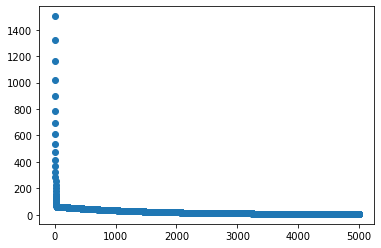

In [352]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [353]:
## Next we have to build gradient decent for reducing errors

In [354]:
slope, intercept

(19.346408182809146, 75.52513679733902)

In [355]:
test_x

16    13.20
17     4.50
18     0.90
19     4.70
20     6.11
21    11.30
22     7.60
23     5.50
Name: Distance, dtype: float64

In [356]:
test_y

16    330
17    170
18     90
19    170
20    190
21    290
22    230
23    190
Name: Fare, dtype: int64

In [357]:
val = slope*test_x+intercept

In [358]:
val

16    330.897725
17    162.583974
18     92.936904
19    166.453255
20    193.731691
21    294.139549
22    222.557839
23    181.930382
Name: Distance, dtype: float64